In [1]:
# Import necessary libraries
import numpy as np          # For numerical operations and arrays
import matplotlib.pyplot as plt  # For plotting and visualization

In [2]:
# Define positive class data points (label = +1)
# These points are chosen to require multiple iterations for learning
positive_points = np.array([[1, 1], [2, 2], [2, 0]])
print("Positive points:")
positive_points

Positive points:


array([[1, 1],
       [2, 2],
       [2, 0]])

In [3]:
# Define negative class data points (label = -1)
# These points are chosen to require multiple iterations for learning
negative_points = np.array([[-1, -1], [0, -2], [-2, 0]])
print("Negative points:")
negative_points

Negative points:


array([[-1, -1],
       [ 0, -2],
       [-2,  0]])

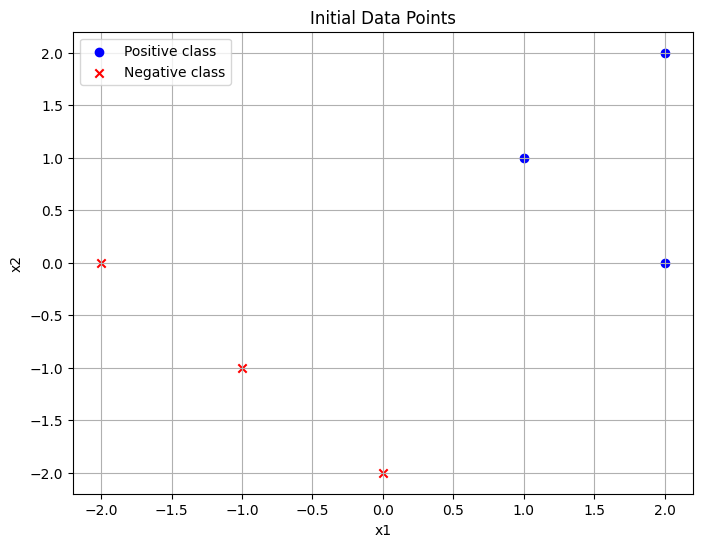

In [4]:
# Visualize the initial data points
plt.figure(figsize=(8, 6))
# Plot positive points as blue circles
plt.scatter(positive_points[:, 0], positive_points[:, 1], c='blue', marker='o', label='Positive class')
# Plot negative points as red x's
plt.scatter(negative_points[:, 0], negative_points[:, 1], c='red', marker='x', label='Negative class')
plt.xlabel('x1')  # Feature 1
plt.ylabel('x2')  # Feature 2
plt.title('Initial Data Points')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Combine positive and negative points into feature matrix X
# Each row is a data point [x1, x2]
X = np.vstack((positive_points, negative_points))
print("Feature matrix X:")
X

Feature matrix X:


array([[ 1,  1],
       [ 2,  2],
       [ 2,  0],
       [-1, -1],
       [ 0, -2],
       [-2,  0]])

In [6]:
# Create label vector y
# +1 for positive class, -1 for negative class
y = np.array([1] * len(positive_points) + [-1] * len(negative_points))
print("Label vector y:")
y

Label vector y:


array([ 1,  1,  1, -1, -1, -1])

In [7]:
def plot_decision_boundary(theta, theta_0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], c='blue', label='Positive class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], c='red', label='Negative class')
    
    # Plot decision boundary
    x_values = np.linspace(-3, 3, 2)
    # Check for theta[1] to avoid division by zero (vertical line case)
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta_0) / theta[1]
        plt.plot(x_values, y_values, 'g-', linewidth=2, label=f'Iteration {iteration}')
    else:
        # Plot vertical line
        x_val = -theta_0 / theta[0] if theta[0] != 0 else 0
        plt.axvline(x=x_val, color='green', linewidth=2, label=f'Iteration {iteration}')
    
    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def perceptron(X, y, steps):
    """
    Perceptron Learning Algorithm - Modified to show gradual learning
    
    Parameters:
    X: feature matrix (n_samples x n_features)
    y: label vector (n_samples,) with values +1 or -1
    steps: number of iterations through the dataset
    
    Returns:
    theta: final weight vector
    theta_0: final bias term
    
    Algorithm:
    1. Initialize weights to zero
    2. For each iteration:
       - Go through each data point
       - If misclassified: update weights and show boundary
    """
    
    # Step 1: Initialize parameters to zero
    theta = np.zeros(X.shape[1])  # Weight vector [theta1, theta2]
    theta_0 = 0                   # Bias term
    
    print(f"Initial theta: {theta}, theta_0: {theta_0}")
    
    # Show initial state (all points misclassified)
    plot_decision_boundary(theta, theta_0, 0)
    
    iteration_count = 1
    
    # Step 2: Main perceptron learning loop
    for step in range(steps):
        print(f"\n--- Pass {step + 1} through data ---")
        mistakes_made = False
        
        # Go through each data point in the dataset
        for i, x_i in enumerate(X):
            # Calculate prediction: sign(theta · x_i + theta_0)
            prediction = np.dot(theta, x_i) + theta_0
            
            # Check if current hypothesis makes a mistake
            # Mistake occurs when y[i] * prediction <= 0
            if y[i] * prediction <= 0:
                print(f"  Mistake on point {i}: {x_i}, label: {y[i]}")
                print(f"  Before update - theta: {theta}, theta_0: {theta_0}")
                
                # Perceptron update rule:
                # theta = theta + y[i] * x_i
                # theta_0 = theta_0 + y[i]
                theta = theta + y[i] * x_i
                theta_0 = theta_0 + y[i]
                
                print(f"  After update - theta: {theta}, theta_0: {theta_0}")
                
                # Show decision boundary after each mistake/update
                plot_decision_boundary(theta, theta_0, iteration_count)
                iteration_count += 1
                mistakes_made = True
        
        # If no mistakes were made in this pass, we're done!
        if not mistakes_made:
            print(f"\n🎉 No mistakes in pass {step + 1}! Algorithm converged!")
            break
    
    return theta, theta_0

=== PERCEPTRON LEARNING ALGORITHM ===
Training data shape: (6, 2)
Labels: [ 1  1  1 -1 -1 -1]

Starting perceptron training...

Initial theta: [0. 0.], theta_0: 0


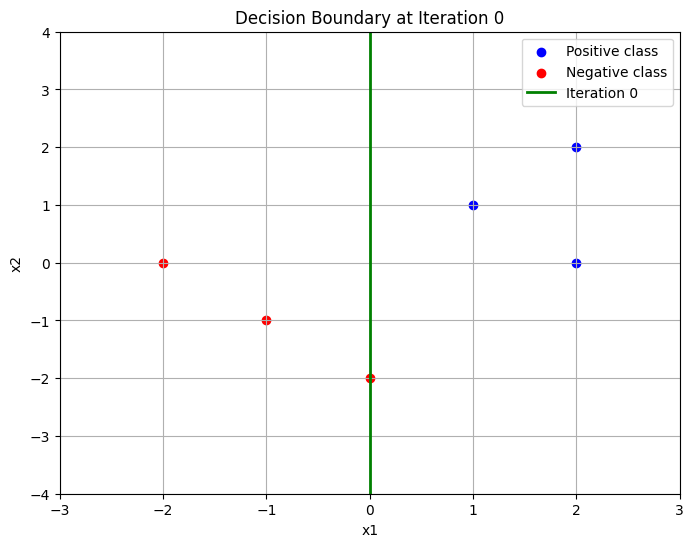


--- Pass 1 through data ---
  Mistake on point 0: [1 1], label: 1
  Before update - theta: [0. 0.], theta_0: 0
  After update - theta: [1. 1.], theta_0: 1


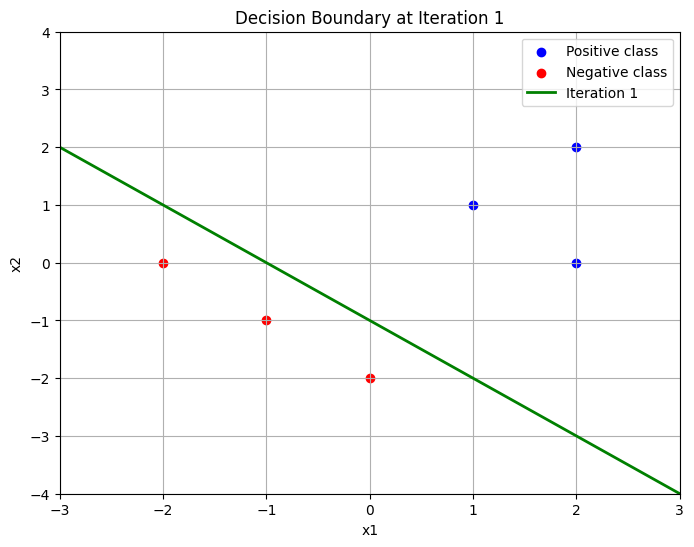


--- Pass 2 through data ---

🎉 No mistakes in pass 2! Algorithm converged!

=== FINAL RESULTS ===
Final weight vector (theta): [1. 1.]
Final bias term (theta_0): 1

Final decision boundary equation: 1.00*x1 + 1.00*x2 + 1.00 = 0

=== TESTING FINAL CLASSIFIER ===
Point 0: [1 1] -> Predicted:  1, Actual:  1, Correct: True
Point 1: [2 2] -> Predicted:  1, Actual:  1, Correct: True
Point 2: [2 0] -> Predicted:  1, Actual:  1, Correct: True
Point 3: [-1 -1] -> Predicted: -1, Actual: -1, Correct: True
Point 4: [ 0 -2] -> Predicted: -1, Actual: -1, Correct: True
Point 5: [-2  0] -> Predicted: -1, Actual: -1, Correct: True

Training Accuracy: 100.0% (6/6)


In [9]:
# Run the perceptron algorithm
print("=== PERCEPTRON LEARNING ALGORITHM ===")
print(f"Training data shape: {X.shape}")
print(f"Labels: {y}")
print("\nStarting perceptron training...\n")

# Train for up to 10 passes through the data
# (Algorithm will stop early if it converges)
theta_final, theta_0_final = perceptron(X, y, 10)

print("\n=== FINAL RESULTS ===")
print(f"Final weight vector (theta): {theta_final}")
print(f"Final bias term (theta_0): {theta_0_final}")
print(f"\nFinal decision boundary equation: {theta_final[0]:.2f}*x1 + {theta_final[1]:.2f}*x2 + {theta_0_final:.2f} = 0")

# Test the final classifier on training data
print("\n=== TESTING FINAL CLASSIFIER ===")
correct = 0
for i, x_i in enumerate(X):
    prediction = np.sign(np.dot(theta_final, x_i) + theta_0_final)
    actual = y[i]
    is_correct = prediction == actual
    correct += is_correct
    print(f"Point {i}: {x_i} -> Predicted: {prediction:2.0f}, Actual: {actual:2.0f}, Correct: {is_correct}")

accuracy = correct / len(X) * 100
print(f"\nTraining Accuracy: {accuracy:.1f}% ({correct}/{len(X)})")